# 0. Install and Import dependencies

In [1]:
!pip install stable-baselines3 gym
!pip install finta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 27.4 MB/s eta 0:00:00


In [2]:
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import gym


/usr/local/lib/python3.11/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation


# 1. Getting Data and preprocessing it from Yahoo Finance

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

btc_data = yf.download('BTC-USD', start='2024-01-01', end='2025-01-15') # 1 year of data
btc_data.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [5]:
btc_data['Date'] = pd.to_datetime(btc_data['Date'])
btc_data = btc_data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
btc_data = btc_data.set_index('Date')

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
btc_data.columns = [col[0] for col in btc_data.columns]  # Use the first level of the MultiIndex


In [8]:
btc_data

,Open,High,Low,Close,Volume
Date,,,,,
2024-01-01,42280.234375,44175.437500,42214.976562,44167.332031,18426978443
2024-01-02,44187.140625,45899.707031,44176.949219,44957.968750,39335274536
2024-01-03,44961.601562,45503.242188,40813.535156,42848.175781,46342323118
2024-01-04,42855.816406,44770.023438,42675.175781,44179.921875,30448091210
2024-01-05,44192.980469,44353.285156,42784.718750,44162.691406,32336029347
...,...,...,...,...,...
2025-01-10,92494.492188,95770.609375,92250.093750,94701.453125,62058693684
2025-01-11,94700.835938,94977.687500,93840.046875,94566.593750,18860894100
2025-01-12,94565.726562,95367.539062,93712.507812,94488.437500,20885130965


In [9]:
btc_data.dtypes

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64


In [10]:
btc_data.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Open,High,Low,Close,Volume
Date,,,,,
2024-01-01,42280.234375,44175.437500,42214.976562,44167.332031,18426978443
2024-01-02,44187.140625,45899.707031,44176.949219,44957.968750,39335274536
2024-01-03,44961.601562,45503.242188,40813.535156,42848.175781,46342323118
2024-01-04,42855.816406,44770.023438,42675.175781,44179.921875,30448091210
2024-01-05,44192.980469,44353.285156,42784.718750,44162.691406,32336029347


In [11]:
btc_data.head().sort_values('Date', ascending=True, inplace=True)
btc_data

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-11-096c19eb4068>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_data.head().sort_values('Date', ascending=True, inplace=True)


,Open,High,Low,Close,Volume
Date,,,,,
2024-01-01,42280.234375,44175.437500,42214.976562,44167.332031,18426978443
2024-01-02,44187.140625,45899.707031,44176.949219,44957.968750,39335274536
2024-01-03,44961.601562,45503.242188,40813.535156,42848.175781,46342323118
2024-01-04,42855.816406,44770.023438,42675.175781,44179.921875,30448091210
2024-01-05,44192.980469,44353.285156,42784.718750,44162.691406,32336029347
...,...,...,...,...,...
2025-01-10,92494.492188,95770.609375,92250.093750,94701.453125,62058693684
2025-01-11,94700.835938,94977.687500,93840.046875,94566.593750,18860894100
2025-01-12,94565.726562,95367.539062,93712.507812,94488.437500,20885130965


# 2. Build Environment

In [202]:
from time import time
from enum import Enum

import numpy as np
import matplotlib.pyplot as plt

import gymnasium as gym


class Actions(Enum):
    Sell = 0
    Buy = 1


class Positions(Enum):
    Short = 0
    Long = 1

    def opposite(self):
        return Positions.Short if self == Positions.Long else Positions.Long


class TradingEnv(gym.Env):

    metadata = {'render_modes': ['human'], 'render_fps': 3}

    def __init__(self, df, window_size, render_mode=None):
        assert df.ndim == 2
        assert render_mode is None or render_mode in self.metadata['render_modes']

        self.render_mode = render_mode

        self.df = df
        self.window_size = window_size
        self.prices, self.signal_features = self._process_data()
        self.shape = (window_size, self.signal_features.shape[1])

        # spaces
        self.action_space = gym.spaces.Discrete(len(Actions))
        INF = 1e10
        self.observation_space = gym.spaces.Box(
            low=-INF, high=INF, shape=self.shape, dtype=np.float32,
        )

        # episode
        self._start_tick = self.window_size
        self._end_tick = len(self.prices) - 1
        self._truncated = None
        self._current_tick = None
        self._last_trade_tick = None
        self._position = None
        self._position_history = None
        self._total_reward = None
        self._total_profit = None
        self._first_rendering = None
        self.history = None
        self.initBalance = 10000

    def reset(self, seed=None, options=None):
        super().reset(seed=seed, options=options)
        if seed is None:
            seed = int(time())  # Use current time as a seed
        self.action_space.seed(int((self.np_random.uniform(0, seed if seed is not None else 1))))

        self._truncated = False
        self._current_tick = self._start_tick
        self._last_trade_tick = self._current_tick - 1
        self._position = Positions.Short
        self._position_history = (self.window_size * [None]) + [self._position]
        self._total_reward = 0.
        self._total_profit = 1.  # unit
        self._first_rendering = True
        self.history = {}

        observation = self._get_observation()
        info = self._get_info()

        if self.render_mode == 'human':
            self._render_frame()

        return observation, info

    def step(self, action):
        self._truncated = False
        self._current_tick += 1

        if self._current_tick == self._end_tick:
            self._truncated = True

        step_reward = self._calculate_reward(action)
        self._total_reward += step_reward

        self._update_profit(action)

        trade = False
        if (
            (action == Actions.Buy.value and self._position == Positions.Short) or
            (action == Actions.Sell.value and self._position == Positions.Long)
        ):
            trade = True

        if trade:
            self._position = self._position.opposite()
            self._last_trade_tick = self._current_tick

        self._position_history.append(self._position)
        observation = self._get_observation()
        info = self._get_info()
        self._update_history(info)

        if self.render_mode == 'human':
            self._render_frame()

        return observation, step_reward, False, self._truncated, info

    def _get_info(self):
        return dict(
            total_reward=self._total_reward,
            total_profit=self._total_profit,
            position=self._position
        )

    def _get_observation(self):
        return self.signal_features[(self._current_tick-self.window_size+1):self._current_tick+1]

    def _update_history(self, info):
        if not self.history:
            self.history = {key: [] for key in info.keys()}

        for key, value in info.items():
            self.history[key].append(value)

        # Save positions for final rendering
        self.history['positions'] = self._position_history

    def _render_frame(self):
        self.render()

    def render(self, mode='human'):

        def _plot_position(position, tick):
            color = None
            if position == Positions.Short:
                color = 'red'
            elif position == Positions.Long:
                color = 'green'
            if color:
                plt.scatter(tick, self.prices[tick], color=color)

        start_time = time()

        if self._first_rendering:
            self._first_rendering = False
            plt.cla()
            plt.plot(self.prices)
            start_position = self._position_history[self._start_tick]
            _plot_position(start_position, self._start_tick)

        _plot_position(self._position, self._current_tick)

        plt.suptitle(
            "Total Reward: %.6f" % self._total_reward + ' ~ ' +
            "Profit Percentage: %.6f" % self._total_profit + +"% " ' ~ ' +
            "Final networth: %.6f" % (self._total_profit * self.initBalance + self.initBalance)
        )


        end_time = time()
        process_time = end_time - start_time

        pause_time = (1 / self.metadata['render_fps']) - process_time
        assert pause_time > 0., "High FPS! Try to reduce the 'render_fps' value."

        plt.pause(pause_time)

    def render_all(self, title=None):
        window_ticks = np.arange(len(self._position_history))
        plt.plot(self.prices)

        short_ticks = []
        long_ticks = []
        for i, tick in enumerate(window_ticks):
            if self._position_history[i] == Positions.Short:
                short_ticks.append(tick)
            elif self._position_history[i] == Positions.Long:
                long_ticks.append(tick)

        plt.plot(short_ticks, self.prices[short_ticks], 'ro')
        plt.plot(long_ticks, self.prices[long_ticks], 'go')

        if title:
            plt.title(title)

        if (self._total_profit - 1) > 0:
            total_profit_percentage_text = "Gain Percentage " +f"{((self._total_profit - 1) * 100):.2f}%"
        else:
            total_profit_percentage_text = "Gain Percentage " +f"{((self._total_profit - 1) * 100):.2f}%"
        plt.suptitle(
            f"Total Reward: {self._total_reward:.6f} ~ "+
            total_profit_percentage_text +' ~ ' +
            f"Final networth: {self._total_profit * self.initBalance + self.initBalance}"
        )
    def close(self):
        plt.close()

    def save_rendering(self, filepath):
        plt.savefig(filepath)

    def pause_rendering(self):
        plt.show()

    def render_final_plot(self, title=None):
        window_ticks = np.arange(len(self.history['positions']))
        plt.figure(figsize=(15, 6))
        plt.plot(self.prices, label="Prices")

        short_ticks = []
        long_ticks = []
        for i, tick in enumerate(window_ticks):
            if self.history['positions'][i] == Positions.Short:
                short_ticks.append(tick)
            elif self.history['positions'][i] == Positions.Long:
                long_ticks.append(tick)

        plt.scatter(short_ticks, self.prices[short_ticks], color='red', label="Short Positions")
        plt.scatter(long_ticks, self.prices[long_ticks], color='green', label="Long Positions")

        plt.xlabel("Time")
        plt.ylabel("Price")
        if title:
            plt.title(title)
        if (self._total_profit - 1) > 0:
           total_profit_percentage_text = "Gain Percentage " +f"{((self._total_profit - 1) * 100):.2f}%"
        else:
            total_profit_percentage_text = "Gain Percentage " +f"{((self._total_profit - 1) * 100):.2f}%"
        plt.suptitle(
            f"Total Reward: {self._total_reward:.6f} ~ "+
            total_profit_percentage_text +' ~ ' +
            f"Final networth: {self._total_profit * self.initBalance + self.initBalance}"
        )
        plt.legend()
        plt.show()

    def _process_data(self):
        raise NotImplementedError

    def _calculate_reward(self, action):
        raise NotImplementedError

    def _update_profit(self, action):
        raise NotImplementedError

    def max_possible_profit(self):  # trade fees are ignored
        raise NotImplementedError

In [203]:
from time import time
from enum import Enum

import numpy as np
import matplotlib.pyplot as plt

import gymnasium as gym

class CryptoEnv(TradingEnv):
    def __init__(self, df, window_size, frame_bound, unit_side='left', render_mode=None):
        assert len(frame_bound) == 2
        assert unit_side.lower() in ['left', 'right']

        self.frame_bound = frame_bound
        self.unit_side = unit_side.lower()
        super().__init__(df, window_size, render_mode)

        self.trade_fee = 0.0003  # unit

    def _process_data(self):
        start = self.frame_bound[0] - self.window_size
        end = self.frame_bound[1]
        prices = self.df.loc[:, 'Low'].to_numpy()[start:end]
        signal_features = self.df.loc[:, ['Low', 'Volume','SMA', 'RSI', 'OBV']].to_numpy()[start:end]
        return prices, signal_features

    def _calculate_reward(self, action):
        step_reward = 0  # pip

        trade = (
            (action == Actions.Buy.value and self._position == Positions.Short) or
            (action == Actions.Sell.value and self._position == Positions.Long)
        )

        if trade:
            current_price = self.prices[self._current_tick]
            last_trade_price = self.prices[self._last_trade_tick]
            price_diff = current_price - last_trade_price

            if self._position == Positions.Short:
                # Reward is positive if prices drop for short positions
                step_reward += -price_diff * 10000
            elif self._position == Positions.Long:
                # Reward is positive if prices rise for long positions
                step_reward += price_diff * 10000

        return step_reward

    def _update_profit(self, action):
        trade = (
            (action == Actions.Buy.value and self._position == Positions.Short) or
            (action == Actions.Sell.value and self._position == Positions.Long)
        )

        # Update profit only when a trade happens or the episode ends
        if trade or self._truncated:
            current_price = self.prices[self._current_tick]
            last_trade_price = self.prices[self._last_trade_tick]

            if self.unit_side == 'left':
                if self._position == Positions.Short:
                    # For short positions: Profit increases if prices drop
                    quantity = self._total_profit * (last_trade_price - self.trade_fee)
                    self._total_profit = quantity / current_price
                elif self._position == Positions.Long:
                    # For long positions: Profit increases if prices rise
                    self._total_profit *= (current_price - self.trade_fee) / last_trade_price

            elif self.unit_side == 'right':
                if self._position == Positions.Short:
                    # For short positions: Profit increases if prices drop
                    self._total_profit *= last_trade_price / (current_price + self.trade_fee)
                elif self._position == Positions.Long:
                    # For long positions: Profit increases if prices rise
                    self._total_profit *= (current_price - self.trade_fee) / last_trade_price

            # Update the last trade tick
            self._last_trade_tick = self._current_tick

    def max_possible_profit(self):
        current_tick = self._start_tick
        last_trade_tick = current_tick - 1
        profit = 1.0

        while current_tick <= self._end_tick:
            position = None
            if self.prices[current_tick] < self.prices[current_tick - 1]:
                while (
                    current_tick <= self._end_tick and
                    self.prices[current_tick] < self.prices[current_tick - 1]
                ):
                    current_tick += 1
                position = Positions.Short
            else:
                while (
                    current_tick <= self._end_tick and
                    self.prices[current_tick] >= self.prices[current_tick - 1]
                ):
                    current_tick += 1
                position = Positions.Long

            current_price = self.prices[current_tick - 1]
            last_trade_price = self.prices[last_trade_tick]

            if self.unit_side == 'left':
                if position == Positions.Short:
                    quantity = profit * (last_trade_price - self.trade_fee)
                    profit = quantity / current_price
                elif position == Positions.Long:
                    quantity = profit / last_trade_price
                    profit = quantity * (current_price - self.trade_fee)

            last_trade_tick = current_tick - 1

        return profit


# 2.1 Add Custom Indicators

## 2.1.3. Calculate SMA, RSI and OBV

In [204]:
from finta import TA

In [205]:
btc_data['SMA'] = TA.SMA(btc_data, 12)
btc_data['RSI'] = TA.RSI(btc_data)
btc_data['OBV'] = TA.OBV(btc_data)
btc_data.fillna(0, inplace=True)

In [206]:
btc_data.head(15)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2024-01-01,42280.234375,44175.437500,42214.976562,44167.332031,18426978443,0.000000,0.000000,0.000000e+00
2024-01-02,44187.140625,45899.707031,44176.949219,44957.968750,39335274536,0.000000,100.000000,3.933527e+10
2024-01-03,44961.601562,45503.242188,40813.535156,42848.175781,46342323118,0.000000,25.814842,-7.007049e+09
2024-01-04,42855.816406,44770.023438,42675.175781,44179.921875,30448091210,0.000000,50.684383,2.344104e+10
2024-01-05,44192.980469,44353.285156,42784.718750,44162.691406,32336029347,0.000000,50.448737,-8.894987e+09
2024-01-06,44178.953125,44227.632812,43475.156250,43989.195312,16092503468,0.000000,48.027408,-2.498749e+10
2024-01-07,43998.464844,44495.570312,43662.230469,43943.097656,19330573863,0.000000,47.376766,-4.431806e+10
2024-01-08,43948.707031,47218.000000,43244.082031,46970.503906,42746192015,0.000000,73.125939,-1.571872e+09
2024-01-09,46987.640625,47893.699219,45244.714844,46139.730469,39821290992,0.000000,63.887507,-4.139316e+10


In [207]:
new_env = CryptoEnv(df=btc_data, frame_bound=(5,250), window_size=5)

In [208]:
new_env.signal_features

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[ 4.22149766e+04,  1.84269784e+10,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 4.41769492e+04,  3.93352745e+10,  0.00000000e+00,
         1.00000000e+02,  3.93352745e+10],
       [ 4.08135352e+04,  4.63423231e+10,  0.00000000e+00,
         2.58148425e+01, -7.00704858e+09],
       ...,
       [ 5.56731641e+04,  3.56276803e+10,  5.99369199e+04,
         4.38356572e+01, -1.87676833e+11],
       [ 5.57124531e+04,  3.10302807e+10,  5.92687113e+04,
         3.94201497e+01, -2.18707114e+11],
       [ 5.25986992e+04,  4.93616936e+10,  5.84033122e+04,
         3.48087896e+01, -2.68068808e+11]])

In [209]:
new_env.initBalance

10000

info {'total_reward': -183909960.9375, 'total_profit': 0.6497189953649604, 'position': <Positions.Short: 0>}


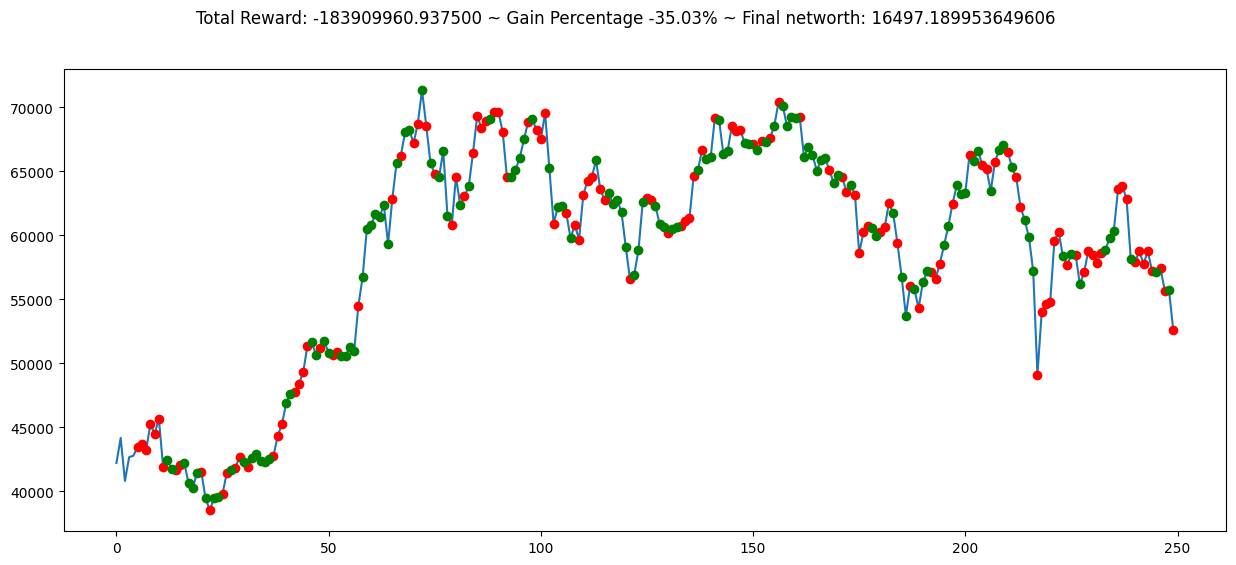

In [210]:
state = new_env.reset()
while True:
    action = new_env.action_space.sample()

    n_state, reward , _ , done, info = new_env.step(action)
    if done:
        print("info", info)
        break

plt.figure(figsize=(15,6))
plt.cla()
new_env.render_all()
plt.show()

# 3. Build Environment and Train

In [211]:
env_maker = lambda: new_env
env_d = DummyVecEnv([env_maker])

In [212]:
btc_data_norm = btc_data.copy()
btc_data_norm['Low'] = (btc_data_norm['Low'] - btc_data_norm['Low'].mean()) / btc_data_norm['Low'].std()
btc_data_norm['Volume'] = (btc_data_norm['Volume'] - btc_data_norm['Volume'].mean()) / btc_data_norm['Volume'].std()


In [213]:
train_env = CryptoEnv(df=btc_data_norm, frame_bound=(5,250), window_size=5)

In [214]:
#!pip install sb3_contrib

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [215]:
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.monitor import Monitor
from sb3_contrib import RecurrentPPO  # For LSTM-based policies
import numpy as np


# Wrapping the environment with Monitor for better logging and evaluation
def make_env():
    return Monitor(train_env)


vec_env = DummyVecEnv([make_env])

ppo_params = {
    "policy": "MlpLstmPolicy",  # Using LSTM-based policy
    "env": vec_env,
    "learning_rate": 2e-4,  # Slightly higher learning rate
    "n_steps": 4096,  # More steps per update
    "batch_size": 32,  # Smaller batches
    "gae_lambda": 0.95,
    "gamma": 0.99,
    "clip_range": 0.2,
    "ent_coef": 0.02,  # Higher entropy coefficient
    "vf_coef": 0.5,
    "max_grad_norm": 0.1,  # Stricter gradient clipping
    "verbose": 1
}

ppo_model = RecurrentPPO(**ppo_params)

# Add evaluation callback to monitor progress
eval_callback = EvalCallback(
    vec_env,
    best_model_save_path="./logs/",
    log_path="./logs/",
    eval_freq=5000,  # Evaluate the model every 5000 steps
    deterministic=True,
    render=False
)

Using cuda device


In [216]:
#ppo_model.learn(total_timesteps=100000, callback=eval_callback)
#ppo_model.save("ppo_lstm_crypto_model")

# 4. Evaluation

In [217]:
def preprocess_data(coin_to_trade="BTC-USD",  start='2024-01-01', end='2025-01-15'):
  df = yf.download(coin_to_trade, start=start, end=end)
  df.dropna(inplace=True)
  df.reset_index(inplace=True)
  df['Date'] = pd.to_datetime(df['Date'])
  df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
  df = df.set_index('Date')
  df.columns = [col[0] for col in df.columns]  # Use the first level of the MultiIndex
  df.head().sort_values('Date', ascending=True, inplace=True)
  df['SMA'] = TA.SMA(df, 12)
  df['RSI'] = TA.RSI(df)
  df['OBV'] = TA.OBV(df)
  df.fillna(0, inplace=True)
  return df

In [221]:
def testing_env_and_model(model):
  global test_env
  test_btc_data = preprocess_data()
  print(test_btc_data.head())
  test_env = CryptoEnv(df=test_btc_data, window_size=5, frame_bound=(5,250))
  obs, info = test_env.reset()
  while True:
      action, _ = model.predict(obs)
      print(action)
      obs, reward, done, truncated, info = test_env.step(action)
      print(info)
      if done or truncated:
          break

In [226]:
ppo_modelx = RecurrentPPO.load("ppo_lstm_crypto_model")

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [227]:
testing_env_and_model(ppo_modelx)

[*********************100%***********************]  1 of 1 completed
<ipython-input-217-48d71af8ca9f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
1
{'total_reward': -4593632.812

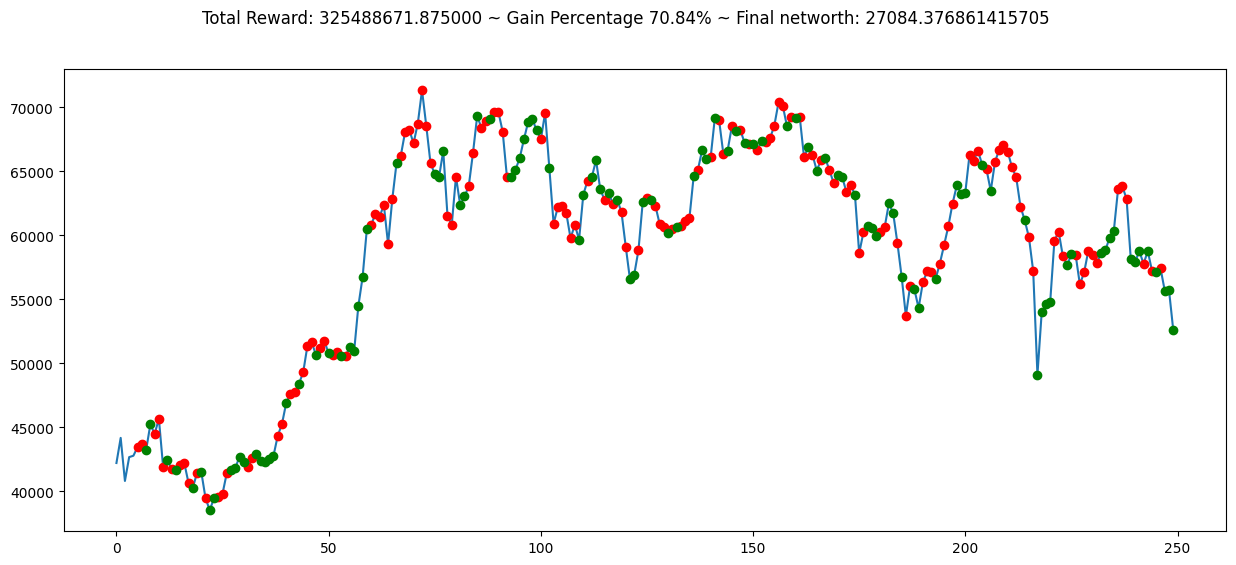

In [228]:
plt.figure(figsize=(15,6))
plt.cla()
test_env.render_all()
plt.show()